In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('/content/gender_classification_v7.csv', sep=',')
print(df.info(), "\n")
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB
None 



,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [5]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df)
categorical_columns

['gender']

In [6]:
df_cat = df[categorical_columns] #отберем только те столбцы в которых присутствует категориальная перемнная
df_cat.head()

,gender
0,Male
1,Female
2,Male
3,Male
4,Female


In [7]:
from sklearn.preprocessing import OrdinalEncoder

education_column = df_cat[["gender"]]

print(df_cat['gender'].unique()) #посмотрим какие виды образования присутствуют в выборке

encoder = OrdinalEncoder()   # вызываем кодировщик
encoder  = encoder.fit(df_cat[['gender']])
df_cat['gender'] = encoder.transform(df_cat[['gender']])
df_cat

['Male' 'Female']


<ipython-input-7-f44504ae0568>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['gender'] = encoder.transform(df_cat[['gender']])


,gender
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
4996,0.0
4997,0.0
4998,0.0
4999,0.0


In [8]:
df['gender']=df_cat
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1.0
1,0,14.0,5.4,0,0,1,0,0.0
2,0,11.8,6.3,1,1,1,1,1.0
3,0,14.4,6.1,0,1,1,1,1.0
4,1,13.5,5.9,0,0,0,0,0.0
5,1,13.0,6.8,1,1,1,1,1.0
6,1,15.3,6.2,1,1,1,0,1.0
7,0,13.0,5.2,0,0,0,0,0.0
8,1,11.9,5.4,1,0,1,1,0.0
9,1,12.1,5.4,0,0,0,0,0.0


In [15]:
X=df.iloc[:,:6]
y=df.iloc[:,7]
X, y

(      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
 0             1               11.8                 6.1          1          0   
 1             0               14.0                 5.4          0          0   
 2             0               11.8                 6.3          1          1   
 3             0               14.4                 6.1          0          1   
 4             1               13.5                 5.9          0          0   
 ...         ...                ...                 ...        ...        ...   
 4996          1               13.6                 5.1          0          0   
 4997          1               11.9                 5.4          0          0   
 4998          1               12.9                 5.7          0          0   
 4999          1               13.2                 6.2          0          0   
 5000          1               15.4                 5.4          1          1   
 
       lips_thin  
 0     

In [16]:
#Алгоритм K-средних
from sklearn.cluster import KMeans
# настройка K-Means
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 40)
# Вычислить центры кластеров и спрогнозировать индекс кластера для каждой выборки.
y_kmeans = kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
# центры кластеров
print(kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 0.87061611 12.12028436  5.94611374  0.46587678  0.48104265  0.46682464]
 [ 0.86271777 14.42        6.10132404  0.8912892   0.90243902  0.89825784]
 [ 0.875      13.49869505  5.79381868  0.14285714  0.15796703  0.13186813]]


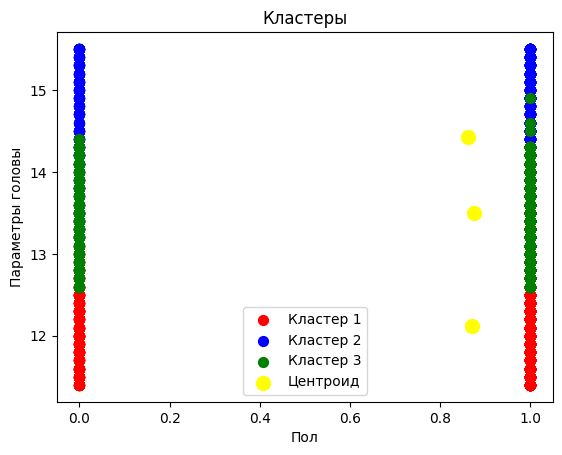

In [19]:
# визуализация кластеров
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Кластер 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Кластер 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Кластер 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label =
'Центроид')
plt.title('Кластеры')
plt.xlabel('Пол')
plt.ylabel('Параметры головы')
plt.legend(loc='best')
plt.show()

In [27]:
# добавить новый столбец и присвоить ему значения кластера
kl=kmeans.labels_.reshape(-1,1)
z=np.hstack((X, kl))
z=pd.DataFrame(z,columns=['long_hair', 'forehead_width_cm', 'forehead_height_cm','nose_wide', 'nose_long', 'lips_thin','claster'])
z

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,claster
0,1.0,11.8,6.1,1.0,0.0,1.0,0.0
1,0.0,14.0,5.4,0.0,0.0,1.0,2.0
2,0.0,11.8,6.3,1.0,1.0,1.0,0.0
3,0.0,14.4,6.1,0.0,1.0,1.0,1.0
4,1.0,13.5,5.9,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...
4996,1.0,13.6,5.1,0.0,0.0,0.0,2.0
4997,1.0,11.9,5.4,0.0,0.0,0.0,0.0
4998,1.0,12.9,5.7,0.0,0.0,0.0,2.0
4999,1.0,13.2,6.2,0.0,0.0,0.0,2.0


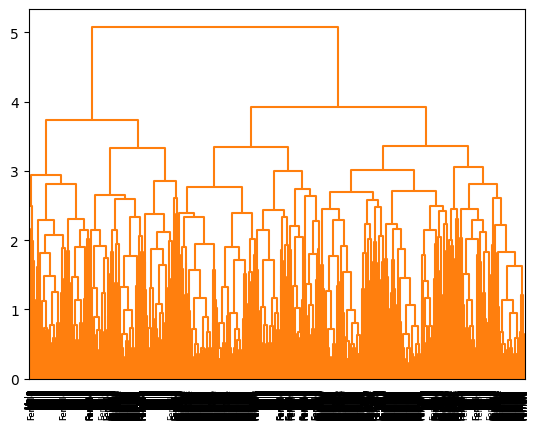

In [29]:
#Иерархическая кластеризация
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import requests
from io import StringIO

# Создаем датафрейм для загруженного набора данных

seeds_df = pd.read_csv('/content/gender_classification_v7.csv')

# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
varieties = list(seeds_df.pop('gender'))

# Извлекаем измерения как массив NumPy
samples = seeds_df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           color_threshold=6,
           )

plt.show()

In [32]:
from sklearn import metrics # метрики
from sklearn import datasets # набор данных
import pandas as pd # для работы с таблицами
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering # разные методы кластеризации, добавьте и другие


algorithms = [] # будем добавлять методы кластеризации
algorithms.append(KMeans(n_clusters=10, random_state=1)) # метод к-средних
algorithms.append(AffinityPropagation()) # метод на основе афинных преобразований
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors')) # метод на основе спектров
algorithms.append(AgglomerativeClustering(n_clusters=10)) # еще какой-то метод
# добавьте сюда и другие

data = [] #
for algo in algorithms: # для каждого метода
    algo.fit(X) # обучаем его (выполняем кластеризацию)
    # считаем и добавляем метрики
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_), # какие-то метрики ...
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

# оформляем результат как табличку
results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure',
                                           'Silhouette'],
                       index=['K-means', 'Affinity',
                              'Spectral', 'Agglomerative'])

results # отображаем ее

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.185931,0.367914,0.787249,0.240377,0.368298,0.217241
Affinity,0.007305,0.134038,0.847595,0.097466,0.174828,0.219240
Spectral,0.143238,0.321454,0.649074,0.214013,0.321892,0.127463
Agglomerative,0.197640,0.323817,0.676521,0.213213,0.324238,0.197133


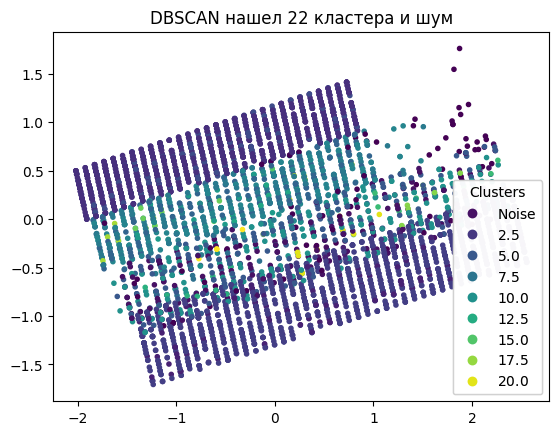

In [31]:
# Импортируем библиотеки
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN # DBSCAN
from sklearn.decomposition import PCA
import numpy as np


# Создаем кластеризатор
dbscan = DBSCAN()

# Обучаем его (выполняем кластеризацию)
dbscan.fit(X)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)


N_cluster=dbscan.labels_.max()+1 # число найденных кластеров
if_noise=np.count_nonzero(dbscan.labels_==-1) # был ли найден шум (класс с меткой "-1")

fig, ax = plt.subplots()
# Рисуем в соответствии с найденными кластерами
scatter=ax.scatter(pca_2d[:, 0], pca_2d[:, 1],
                   c=dbscan.labels_, # метка кластера - цвет
                   marker='.')
# подпишем легенду
handles,labels=scatter.legend_elements() # указатели и подписи легенды

if if_noise: # если найден шум
    labels[0]='$\\mathdefault{Noise}$' # первую подпись заменим (а она именно первая, поскольку упорядочены по возрастанию и шуму соответствует -1 )

legend1 = ax.legend(handles=handles, labels=labels,
                    loc="lower right", title="Clusters")
ax.add_artist(legend1)

if if_noise: # если найден шум
    plt.title('DBSCAN нашел {:} кластера и шум'.format(N_cluster))
else: # если не было шума
    plt.title('DBSCAN нашел {:} кластера без шума'.format(N_cluster))

plt.show()